In [131]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor,XGBModel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")
#--------------------------------------------------------
#1.Data Selection 
print("==================================================")
print("Antenna  Dataset")
print(" Process - Antenna Detection")
print("==================================================")


Antenna  Dataset
 Process - Antenna Detection


In [132]:

##1.data slection---------------------------------------------------
dataframe=pd.read_csv("synthetic_antenna_data.csv")

print("---------------------------------------------")
print()
print("Data Selection")
print("Samples of our input data")
print(dataframe.head(5))
print("----------------------------------------------")
print()

dataframe.describe()


---------------------------------------------

Data Selection
Samples of our input data
   frequency    length     width    height  substrate_dielectric  \
0  24.123620  1.896323  3.870266  0.307633              2.785117   
1  25.852143  1.572193  4.583802  0.291673              2.740936   
2  25.195982  1.119055  5.245892  0.110257              4.718764   
3  24.795975  2.127590  4.964450  0.236499              2.748639   
4  23.468056  1.869462  5.113122  0.252078              2.815849   

   substrate_thickness  input_power  predicted_gain  
0             0.043101     6.759760        4.296883  
1             0.040581     7.987146        4.408373  
2             0.032941     2.579632        4.455130  
3             0.048242     6.286254        4.597432  
4             0.018019     5.760285        4.497574  
----------------------------------------------



,frequency,length,width,height,substrate_dielectric,substrate_thickness,input_power,predicted_gain
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,24.495685,1.463903,4.535116,0.298591,3.499531,0.030199,5.028617,4.314159
std,0.896065,0.570987,0.594386,0.114804,0.857427,0.011829,2.801577,0.254792
min,23.015185,0.509264,3.509880,0.101287,2.004695,0.010000,0.119722,3.622349
25%,23.723839,0.958198,3.982456,0.196430,2.804337,0.020393,2.572227,4.134709
50%,24.539491,1.443643,4.579477,0.303557,3.488037,0.030074,5.237732,4.323011
75%,25.268375,1.952674,5.054688,0.394951,4.229880,0.040716,7.284293,4.483097
max,25.978894,2.499435,5.498827,0.499339,4.986313,0.049913,9.989037,4.986811


---------------------------------------------

Before Handling Missing Values

frequency               0
length                  0
width                   0
height                  0
substrate_dielectric    0
substrate_thickness     0
input_power             0
predicted_gain          0
dtype: int64
----------------------------------------------

-----------------------------------------------
After handling missing values

frequency               0
length                  0
width                   0
height                  0
substrate_dielectric    0
substrate_thickness     0
input_power             0
predicted_gain          0
dtype: int64

-----------------------------------------------
Shape of Dataset is:  (500, 8) 

   frequency    length     width    height  substrate_dielectric  \
0  24.123620  1.896323  3.870266  0.307633              2.785117   
1  25.852143  1.572193  4.583802  0.291673              2.740936   
2  25.195982  1.119055  5.245892  0.110257              4.718764  

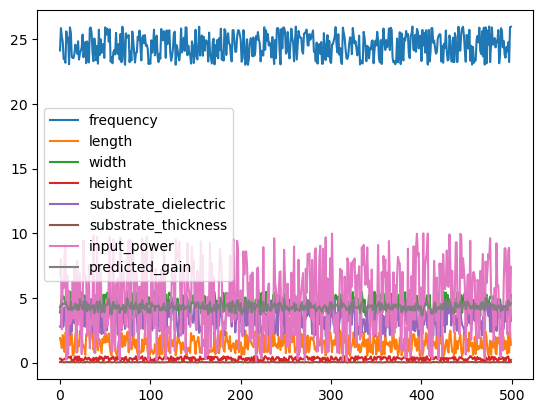

In [133]:

#--------------------------------------------------------
#2.Data Preprocessing  

#checking  missing values 
print("---------------------------------------------")
print()
print("Before Handling Missing Values")
print()
print(dataframe.isnull().sum())
print("----------------------------------------------")
print() 
    
print("-----------------------------------------------")
print("After handling missing values")
print()
dataframe_2=dataframe.fillna(0)
print(dataframe_2.isnull().sum())
print()
print("-----------------------------------------------")

# sns.set()
# plt.style.use('seaborn-whitegrid')

data=dataframe_2
print("Shape of Dataset is: ",data.shape,"\n")
print(data.head())
dataframe_2.plot()

plt.show()

df=dataframe_2

# Handle missing data (impute missing values with mean for continuous features)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



# # Drop unnecessary columns (e.g., 'substrate_thickness')
# df = df.drop(columns=['substrate_thickness'], axis=1)


In [134]:

# Step 3: Split the dataset into features (X) and target (y)
x = df.drop('predicted_gain', axis=1)  # Features: All columns except 'gain'
y = df['predicted_gain']  # Target: The antenna gain

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [135]:

# # Step 4: Feature Scaling (Optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Regression Models

# 1. Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 2. K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 3. Support Vector Machine (SVM) Regression
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Step 6: Evaluate Performance

# Step 7: Performance Estimation

# Function to evaluate performance metrics for regression models
def regression_performance_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE = sqrt(MSE)
    r2 = r2_score(y_true, y_pred)
    print(f"MAE (Mean Absolute Error): {mae:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"R² (R-squared): {r2:.4f}")
    
    # Additional regression performance metrics
    print(f"Train Accuracy (R² on training data): {r2_score(y_train, rf_model.predict(X_train)):.4f}")
    print(f"Test Accuracy (R² on test data): {r2:.4f}")

# 1. Performance for Random Forest Model
print("Random Forest Regression Performance:")
regression_performance_metrics(y_test, y_pred_rf)

# 2. Performance for KNN Model
print("\nKNN Regression Performance:")
regression_performance_metrics(y_test, y_pred_knn)

# 3. Performance for SVM Model
print("\nSVM Regression Performance:")
regression_performance_metrics(y_test, y_pred_svm)

# Optional: Signal-to-Noise Ratio (SNR) Calculation for Regression
def calculate_snr(y_true, y_pred):
    noise = np.subtract(y_true, y_pred)  # Residuals (errors)
    signal = np.mean(y_true)  # Signal is the mean of the true values
    snr = signal / np.std(noise)  # SNR = Signal/Noise
    print(f"SNR (Signal-to-Noise Ratio): {snr:.4f}")


Random Forest Regression Performance:
MAE (Mean Absolute Error): 0.0615
RMSE (Root Mean Squared Error): 0.0787
R² (R-squared): 0.8971
Train Accuracy (R² on training data): 0.9834
Test Accuracy (R² on test data): 0.8971

KNN Regression Performance:
MAE (Mean Absolute Error): 0.0754
RMSE (Root Mean Squared Error): 0.0961
R² (R-squared): 0.8464
Train Accuracy (R² on training data): 0.9834
Test Accuracy (R² on test data): 0.8464

SVM Regression Performance:
MAE (Mean Absolute Error): 0.0462
RMSE (Root Mean Squared Error): 0.0574
R² (R-squared): 0.9453
Train Accuracy (R² on training data): 0.9834
Test Accuracy (R² on test data): 0.9453


In [136]:

# Calculate SNR for each model
print("\nRandom Forest SNR:")
calculate_snr(y_test, y_pred_rf)

print("\nKNN SNR:")
calculate_snr(y_test, y_pred_knn)

print("\nSVM SNR:")
calculate_snr(y_test, y_pred_svm)




Random Forest SNR:
SNR (Signal-to-Noise Ratio): 55.4268

KNN SNR:
SNR (Signal-to-Noise Ratio): 46.0946

SVM SNR:
SNR (Signal-to-Noise Ratio): 76.2476


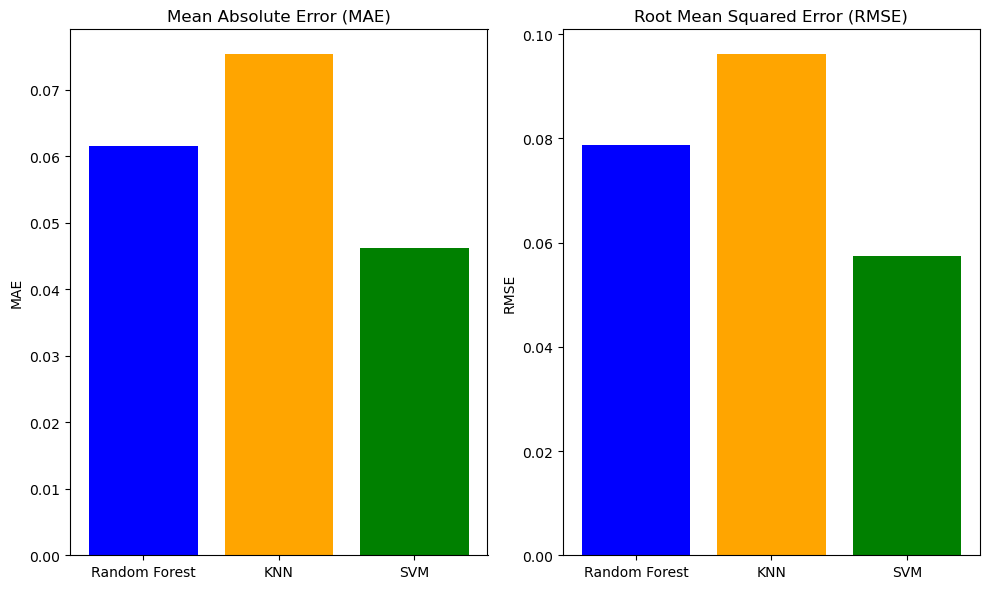

In [137]:
# Save the trained models for later use (as before)
import joblib
joblib.dump(rf_model, 'rf_model.pkl')
def plot_performance_metrics():
    models = ['Random Forest', 'KNN', 'SVM']
    mae_values = [
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_knn),
        mean_absolute_error(y_test, y_pred_svm)
    ]
    
    rmse_values = [
        mean_squared_error(y_test, y_pred_rf,squared=False),
        mean_squared_error(y_test, y_pred_knn,squared=False),
        mean_squared_error(y_test, y_pred_svm,squared=False)
    ]

    plt.figure(figsize=(10, 6))
    
    # Plotting MAE
    plt.subplot(1, 2, 1)
    plt.bar(models, mae_values, color=['blue', 'orange', 'green'])
    plt.title('Mean Absolute Error (MAE)')
    plt.ylabel('MAE')
    
    # Plotting RMSE
    plt.subplot(1, 2, 2)
    plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
    plt.title('Root Mean Squared Error (RMSE)')
    plt.ylabel('RMSE')
    
    plt.tight_layout()
    plt.show()

# Call the plot function to visualize performance metrics
plot_performance_metrics()

In [138]:



joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

print("\nModels have been saved.")


Models have been saved.


In [5]:
import pandas as pd
import joblib

# Load the pre-trained pipeline (which includes both StandardScaler and SVR)
svm_pipeline = joblib.load("C:\\Users\\rogin\\OneDrive\\Desktop\\Project_27.02.2025\\Sourcecode\\svm_model.pkl")  # Ensure this is your pipeline file

# Load the dataset from CSV (make sure it has the same features as used during training)
df = pd.read_csv("synthetic_antenna_data.csv")  # Replace with your actual file name

# Drop the 'predicted_gain' column if it exists to avoid conflicts
if 'predicted_gain' in df.columns:
    df = df.drop(columns=['predicted_gain'])

# Convert DataFrame to NumPy array to avoid feature names warning
X = df.values

# Predict the gain using the loaded pipeline (the scaler step is applied internally)
predicted_gain = svm_pipeline.predict(X)

# Add the predicted gain back to the DataFrame
df['predicted_gain_new'] = predicted_gain

# Save the results to a new CSV file
df.to_csv("final_svm_gain.csv", index=False)





In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("final_svm_gain.csv")

# Filter the dataset for the 25th frequency
df_25th_freq = df[df["frequency"] == df["frequency"].unique()[25]]  # 0-based index, so 24 refers to the 25th frequency

# Find the row with the maximum predicted gain in the 25th frequency
max_gain_row = df_25th_freq.loc[df_25th_freq["predicted_gain_new"].idxmax()]

# Print the result
print(max_gain_row)


frequency               25.355528
length                   1.437386
width                    4.448428
height                   0.202711
substrate_dielectric     2.780473
substrate_thickness      0.021150
input_power              3.801818
predicted_gain_new       6.171341
Name: 25, dtype: float64
